## Inferential Statistics

It is assumed that the mean systolic blood pressure is μ = 120 mm Hg. In the Honolulu Heart Study, a sample of n = 100 people had an average systolic blood pressure of 130.1 mm Hg with a standard deviation of 21.21 mm Hg. Is the group significantly different (with respect to systolic blood pressure!) from the regular population?

- Set up the hypothesis test.
- Write down all the steps followed for setting up the test.
- Calculate the test statistic by hand and also code it in Python. It should be 4.76190. We will take a look at how to make decisions based on this calculated value.

In [1]:
# Libraries
import numpy as np # numerical python
import matplotlib.pyplot as plt # viz
import scipy.stats as sts

#### Set Up Hypothesis test

In [2]:
# Hypotheses
null_hypothesis = "The mean sytolic blood pressure is 120 mm Hg"  # H₀
alt_hypothesis = "The mean sytolic blood pressure is not 120 mm Hg"  # H₁

print(f"Null Hypothesis (H₀): {null_hypothesis}")
print(f"Alternate Hypothesis (H₁): {alt_hypothesis}")

Null Hypothesis (H₀): The mean sytolic blood pressure is 120 mm Hg
Alternate Hypothesis (H₁): The mean sytolic blood pressure is not 120 mm Hg


#### Set up the test

In [3]:
# Significance level
alpha = 0.05
print(f"Level of Significance (α): {alpha}")

Level of Significance (α): 0.05


#### Test statistic

In [4]:
# Parameters for t-test
sample_mean = 130.1
pop_mean = 120
sample_std = 21.21
n = 100

In [5]:
# Calculate the test statistic (t-value)
t_stat = (sample_mean - pop_mean) / (sample_std / (n**0.5))
print(f"Test Statistic (t): {t_stat:.2f}")

Test Statistic (t): 4.76


### Critical Value

In [6]:
# Critical Value for a right one-tailed test
df = n-1
critical_value = sts.t.ppf(1-alpha, df)
print(f"Critical Value: {critical_value:.2f}")

Critical Value: 1.66


### Calculate the P-value

In [7]:
p_value = 1 - sts.t.cdf(t_stat, df) # upper-tailed test
print(f"P-Value: {p_value:.6f}")

if p_value < alpha:
    print("Reject the Null Hypothesis: Significant result.")
else:
    print("Fail to Reject the Null Hypothesis: Not a significant result.")

P-Value: 0.000003
Reject the Null Hypothesis: Significant result.


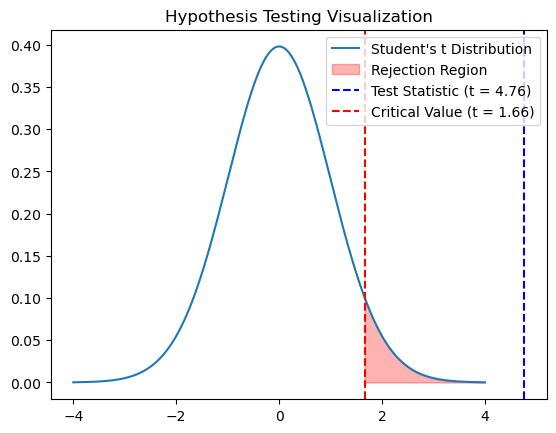

In [8]:
# Create t-distribution curve
x = np.linspace(-4, 4, 1000)  # Adjust range for t-distribution
y = sts.t.pdf(x, df)  # t-distribution PDF

plt.plot(x, y, label="Student's t Distribution")
plt.fill_between(x, 0, y, where=(x > critical_value), color='red', alpha=0.3, label='Rejection Region')
plt.axvline(t_stat, color='blue', linestyle='--', label=f'Test Statistic (t = {t_stat:.2f})')
plt.axvline(critical_value, color='red', linestyle='--', label=f'Critical Value (t = {critical_value:.2f})')
plt.title("Hypothesis Testing Visualization")
plt.legend()
plt.show()